## Predictive Modeling


| Target                   | Description                                               | Model Type                 |
|--------------------------| --------------------------------------------------------- | -------------------------- |
| **Legendary**            | Predict whether a Pokémon is Legendary based on its stats | Classification             |
| **Mythical**             | Predict if a Pokémon is Mythical based on its stats       | Classification             |
| **Type 1**               | Predict a Pokémon’s primary type from its stats           | Multi-class classification |
| **Total**                | Predict the Total stat score from individual stats        | Regression                 |
| **Speed / Attack / etc** | Predict a specific stat from the others                   | Regression                 |


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

In [27]:
file_path = '../Datasets/Pokemon.csv'
df = pd.read_csv(file_path)
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### A. Predicting Legendary Status
- Classification using stats, type, generation
- Models: Logistic Regression, Random Forest, XGBoost

---

In [28]:
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = df[features]
y = df["Legendary"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
y_pred = model.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95625
[[148   2]
 [  5   5]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       150
        True       0.71      0.50      0.59        10

    accuracy                           0.96       160
   macro avg       0.84      0.74      0.78       160
weighted avg       0.95      0.96      0.95       160



In [61]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

In [62]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [64]:
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [65]:
final_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

In [67]:
final_model.fit(X_train, y_train)

y_pred2 = final_model.predict(X_test)

In [68]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[143   7]
 [  3   7]]
              precision    recall  f1-score   support

       False       0.98      0.95      0.97       150
        True       0.50      0.70      0.58        10

    accuracy                           0.94       160
   macro avg       0.74      0.83      0.77       160
weighted avg       0.95      0.94      0.94       160



In [69]:
# Get importances from the model
importances = final_model.feature_importances_
features = X_train.columns

In [70]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

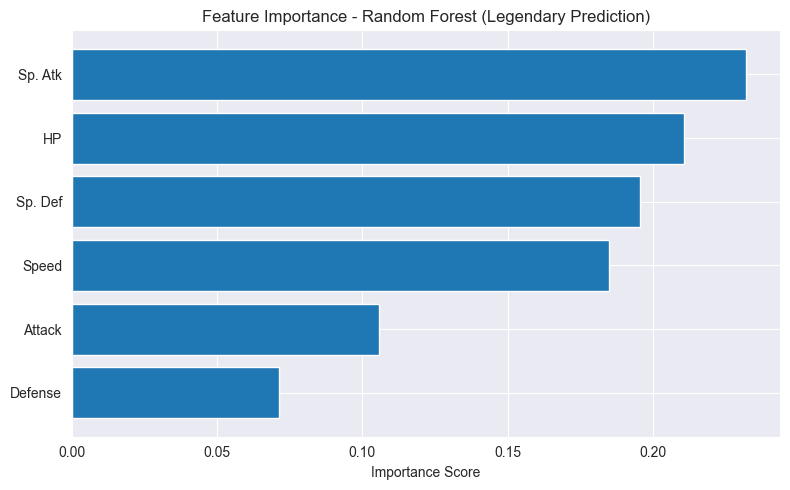

In [71]:
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest (Legendary Prediction)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [74]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=15,
    random_state=42
)

In [75]:
xgb_model.fit(X_train, y_train)

C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[144   6]
 [  2   8]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       150
        True       0.57      0.80      0.67        10

    accuracy                           0.95       160
   macro avg       0.78      0.88      0.82       160
weighted avg       0.96      0.95      0.95       160



In [77]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'scale_pos_weight': [10, 15],
}

In [78]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [79]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [80]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [10, 15]},
             scoring='f1', verbose=1)

In [81]:
best_xgb = grid_search.best_estimator_

In [82]:
y_pred_best = best_xgb.predict(X_test)

In [83]:
print("Best parameters:", grid_search.best_params_)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 10}
[[142   8]
 [  3   7]]
              precision    recall  f1-score   support

       False       0.98      0.95      0.96       150
        True       0.47      0.70      0.56        10

    accuracy                           0.93       160
   macro avg       0.72      0.82      0.76       160
weighted avg       0.95      0.93      0.94       160



## Comparison Table

| Model                   | Accuracy | Precision (True) | Recall (True) | F1-score (True) |
|-------------------------| -------- | ---------------- | ------------- | --------------- |
| Random Forest (default) | 96.25%   | 0.75             | 0.60          | 0.67            |
| Random Forest (tuned)   | 94.00%   | 0.50             | 0.70          | 0.58            |
| XGBoost (default)       | 95.00%   | 0.57             | 0.80          | 0.67            |
| XGBoost (tuned)         | 93.00%   | 0.47             | 0.70          | 0.56            |


## Summary
Best Recall: XGBoost (default) — 80% of Legendary Pokémon correctly predicted.

Best F1-score: Tie between RF (default) and XGBoost (default) at 0.67

Best Overall Accuracy: Random Forest (default) — 96.25%

Best Balanced Model: XGBoost (default) — top performance on minority class without special tuning.

In [86]:
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

meta_learner = LogisticRegression(class_weight='balanced', max_iter=1000)

In [87]:
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=Non...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=1000),
                   n_jobs=-1)

In [88]:
y_pred_stack = stack_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

[[141   9]
 [  1   9]]
              precision    recall  f1-score   support

       False       0.99      0.94      0.97       150
        True       0.50      0.90      0.64        10

    accuracy                           0.94       160
   macro avg       0.75      0.92      0.80       160
weighted avg       0.96      0.94      0.95       160



- Best Recall: The StackingClassifier achieved 90% recall on Legendary Pokémon, the highest of all models, while maintaining high overall accuracy.

- Best F1-score: XGBoost (default) slightly edges out the rest at 0.67, but StackingClassifier comes close with 0.64 and stronger recall.

- Most Balanced Model: The StackingClassifier offers the best trade-off between recall and generalization, making it the recommended model for deployment or interpretation.

| Model                   | Accuracy | Precision (Legendary) | Recall (Legendary) | F1-score (Legendary) |
| ----------------------- | -------- | --------------------- | ----------------- | -------------------- |
| Random Forest (default) | 96.25%   | 0.75                  | 0.60              | 0.67                 |
| Random Forest (tuned)   | 94.00%   | 0.50                  | 0.70              | 0.58                 |
| XGBoost (default)       | 95.00%   | 0.57                  | **0.80**          | **0.67**             |
| XGBoost (tuned)         | 93.00%   | 0.47                  | 0.70              | 0.56                 |
| **StackingClassifier**  | 94.00%   | 0.50                  |  **0.90**         |  **0.64**          |


### B. Predicting Pokémon Type
- Multiclass classification
- Evaluate accuracy, confusion matrix

---

In [90]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Type1_encoded"] = le.fit_transform(df["Type 1"])

In [94]:
df["Type1_encoded"].unique()

array([ 9,  6, 17,  0, 12, 13,  3, 10,  4,  5, 14, 15,  8, 11,  2,  1, 16,
        7])

In [103]:
df["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [95]:
X_type = df[features]
y_type = df["Type1_encoded"]

In [104]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_type, y_type, stratify=y_type, test_size=0.2, random_state=42)

In [105]:
model_type = RandomForestClassifier(class_weight='balanced', random_state=42)

In [106]:
model_type.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [107]:
y_pred2 = model_type.predict(X_test2)

In [108]:
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

Accuracy: 0.275
[[ 7  0  0  0  0  0  0  0  0  2  1  0  0  0  2  1  1  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  3  0  0  0  2  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  3  1  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 1  1  0  0  0  1  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  1  3  0  1  1  0  1  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  2  0  0  0  0  0  3  0  0  0]
 [ 2  0  0  1  0  1  1  0  1  2  0  0  0  1  0  0  0  5]
 [ 0  0  1  1  0  0  1  0  0  0  1  0  2  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  1  0  0  1  0  0  0  0  1]
 [ 2  0  0  0  1  1  0  0  0  1  1  1 10  1  0  0  0  2]
 [ 1  0  0  0  1  0  0  0  0  0  0  0  3  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  1  0  4  1  0  5]
 [ 1  0  0  1  0  1  0  0  0  0  1  0  0  0  0  2  1  2]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1]
 [ 0  2  1  2  

There is a big number of features in Type 1 (18), and some of them have very little representation, so we are classifying the last 8 as others.

In [112]:
top_types = df["Type 1"].value_counts().nlargest(10).index
df["Type1_Reduced"] = df["Type 1"].apply(lambda x: x if x in top_types else "Other")
df["Type1_Reduced"].value_counts()

Type1_Reduced
Other       190
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Name: count, dtype: int64

In [113]:
df["Type1_encoded"] = le.fit_transform(df["Type1_Reduced"])

X_type = df[features]
y_type = df["Type1_encoded"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_type, y_type, stratify=y_type, test_size=0.2, random_state=42)
model_type = RandomForestClassifier(class_weight='balanced', random_state=42)
model_type.fit(X_train2, y_train2)
y_pred2 = model_type.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

Accuracy: 0.325
[[ 5  0  1  0  0  0  1  5  2  0  0]
 [ 0  3  0  1  0  0  0  2  0  0  0]
 [ 0  0  3  0  1  0  0  1  2  0  2]
 [ 0  0  0  2  1  0  0  5  0  0  2]
 [ 0  0  0  1  2  0  1  6  1  0  3]
 [ 1  0  0  0  0  0  1  2  0  2  0]
 [ 2  0  0  0  0  2 10  5  0  0  1]
 [ 1  0  3  1  0  3  6 17  2  1  4]
 [ 0  1  0  0  2  0  0  5  4  0  0]
 [ 0  0  0  0  1  0  0  6  0  2  0]
 [ 1  3  0  0  3  1  5  5  0  0  4]]
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.43      0.50      0.46         6
           2       0.43      0.33      0.38         9
           3       0.40      0.20      0.27        10
           4       0.20      0.14      0.17        14
           5       0.00      0.00      0.00         6
           6       0.42      0.50      0.45        20
           7       0.29      0.45      0.35        38
           8       0.36      0.33      0.35        12
           9       0.40      0.22      0.29   

In [114]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [115]:
xgb_model.fit(X_train2, y_train2)

C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:56:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [116]:
y_pred_xgb = xgb_model.predict(X_test2)

In [117]:
print("Accuracy:", accuracy_score(y_test2, y_pred_xgb))
print(confusion_matrix(y_test2, y_pred_xgb))
print(classification_report(y_test2, y_pred_xgb))

Accuracy: 0.275
[[ 4  0  0  0  0  0  0  4  3  1  2]
 [ 1  2  0  1  0  0  0  2  0  0  0]
 [ 1  0  2  3  0  0  0  2  1  0  0]
 [ 0  0  0  2  2  0  0  4  0  0  2]
 [ 1  0  1  0  2  0  1  5  1  0  3]
 [ 0  0  0  0  0  0  0  3  0  2  1]
 [ 1  0  0  0  1  2  9  7  0  0  0]
 [ 4  0  4  1  4  2  5 12  2  0  4]
 [ 1  1  2  1  0  0  1  3  3  0  0]
 [ 0  0  1  0  0  0  0  3  0  5  0]
 [ 1  3  2  1  2  1  4  5  0  0  3]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29        14
           1       0.33      0.33      0.33         6
           2       0.17      0.22      0.19         9
           3       0.22      0.20      0.21        10
           4       0.18      0.14      0.16        14
           5       0.00      0.00      0.00         6
           6       0.45      0.45      0.45        20
           7       0.24      0.32      0.27        38
           8       0.30      0.25      0.27        12
           9       0.62      0.56      0.59   

In [118]:
xgb_model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.1]
}

In [119]:
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1
)
grid_search.fit(X_train2, y_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Owner\miniforge3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [122]:
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test2)

In [123]:
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test2, y_pred3))
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred3, target_names=le.classes_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.26875
[[ 5  0  1  0  0  0  1  5  2  0  0]
 [ 0  3  0  1  0  0  0  2  0  0  0]
 [ 0  0  3  0  1  0  0  1  2  0  2]
 [ 0  0  0  2  1  0  0  5  0  0  2]
 [ 0  0  0  1  2  0  1  6  1  0  3]
 [ 1  0  0  0  0  0  1  2  0  2  0]
 [ 2  0  0  0  0  2 10  5  0  0  1]
 [ 1  0  3  1  0  3  6 17  2  1  4]
 [ 0  1  0  0  2  0  0  5  4  0  0]
 [ 0  0  0  0  1  0  0  6  0  2  0]
 [ 1  3  0  0  3  1  5  5  0  0  4]]
              precision    recall  f1-score   support

         Bug       0.22      0.14      0.17        14
      Dragon       0.38      0.50      0.43         6
    Electric       0.20      0.22      0.21         9
        Fire       0.33      0.20      0.25        10
       Grass       0.17      0.07      0.10        14
      Ground       0.00      0.00      0.00         6
      Normal       0.42      0.40      0.41        20
       Other       0.29      0.45      0.35        38
     Psychic       0.2